## Final analyses

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import itertools
import random

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = 'diversity_abm/analyses/21_08_20'

In [4]:
def _read_data():
    ds = []
    for n in [0,1,2]:
        for itype in ['strict', 'flexible', 'shortest']:
            fname = f'aggregates_{itype}.tsv'
            d = pd.read_csv(f'{PATH}/{n}_back/{fname}', 
                              sep='\t')
            d.rename({'originality_gain_tot': 'orig_gain_tot'},
                     axis=1, inplace=True)
            ds.append(d)
    return pd.concat(ds, ignore_index=True)

In [5]:
aggs = _read_data()
aggs['diversity_level_dodge'] = (aggs['diversity_level'] - ((aggs['n_back'] - 1)/10))
aggs['fluency_ratio'] = (aggs['fluency_pair'] / 240) * 100

### Fluency

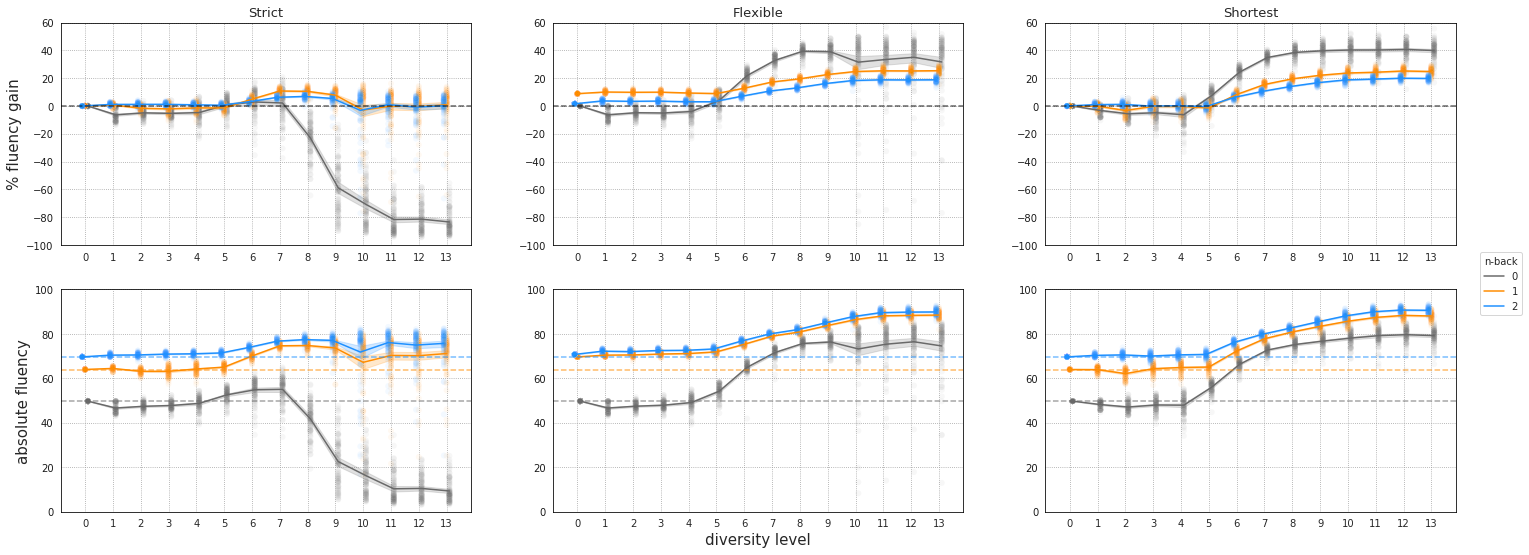

In [15]:
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":",
                            'ytick.color': '.1',
              'axes.facecolor': 'white',
              'axes.edgecolor': 'black'}
             )
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,9))
palette = ['dimgrey', 'darkorange', 'dodgerblue']
n_backs = [0,1,2]; itypes = ['strict', 'flexible', 'shortest']
breaks = np.arange(0,270,30)
aggs['fluency_bin'] = pd.cut(aggs["fluency_pair"],
                             breaks,
                             labels = [f'{breaks[i]}-{breaks[i+1]}'
                                       for i in range(len(breaks)-1)])


for col in range(3):
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                            (aggs['diversity_level']<=13)],
                 x='diversity_level_dodge',
                 y='fluency_gain_tot', ax=ax[0,col], 
                 hue='n_back',
                 palette=palette)
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                              (aggs['diversity_level']<=13)],
                  x='diversity_level_dodge',
                  y='fluency_gain_tot', ax=ax[0,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    ax[0,col].axhline(0, linestyle='--', color='black', alpha=.6)
    ax[0,col].set_ylim(-100,60)
    ax[0,col].set_title(f'{itypes[col].capitalize()}',size=13)
    if col == 0:
        ax[0,col].set_ylabel('% fluency gain', size=15)
    else:
        ax[0,col].set_ylabel('')
    if col == 2:
        ax[0,col].legend(title='n-back', 
                           bbox_to_anchor=(1.11, -.01), 
                           loc='upper center')
    else:
        ax[0,col].legend([],[],frameon=False)
    ax[0,col].set_xticks(range(14))
    
    # Fluency absolute
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                            (aggs['diversity_level']<=13)],
                 x='diversity_level_dodge',
                 y='fluency_ratio', ax=ax[1,col], 
                 hue='n_back',
                 palette=palette) 
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                              (aggs['diversity_level']<=13)],
                  x='diversity_level_dodge',
                  y='fluency_ratio', ax=ax[1,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    for n in range(3):
        ax[1,col].axhline((aggs[aggs['n_back']==n].fluency_a0.iloc[0]/240)*100,
                          color=palette[n], linestyle='--', alpha=.6)
    ax[1,col].set_ylim(0,100)
    ax[1,col].set_title('')
    if col == 0:
        ax[1,col].set_ylabel('absolute fluency', size=15)
    else:
        ax[1,col].set_ylabel('')
    ax[1,col].legend([],[],frameon=False)
    ax[1,col].set_xticks(range(14))    
    
    if col == 1:
        ax[1,col].set_xlabel('diversity level', size=15)
    else:
        ax[1,col].set_xlabel('')
    ax[0,col].set_xlabel('')
# plt.suptitle('Fluency', size=24, y=1.0, x=.51)
plt.show()

### Collective inhibition

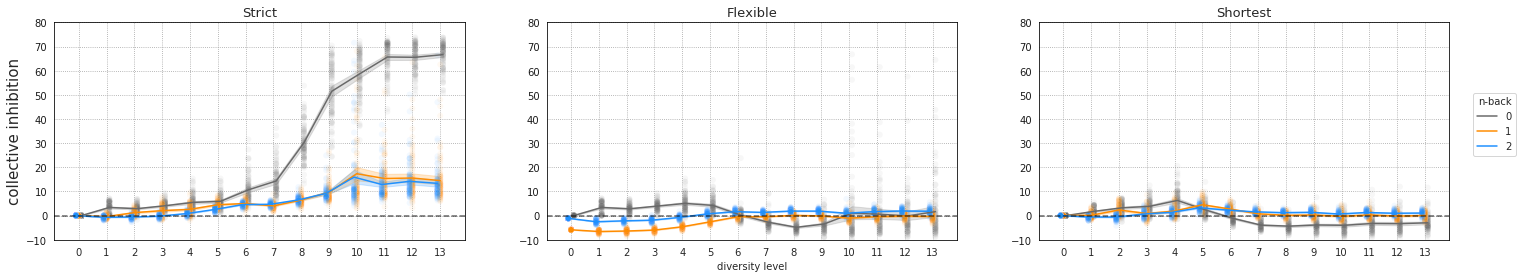

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,4))
for col in range(3):
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                            (aggs['diversity_level']<=13)],
                 x='diversity_level_dodge',
                 y='collective_inhibition', ax=ax[col], 
                 hue='n_back',
                 palette=palette)
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                              (aggs['diversity_level']<=13)],
                  x='diversity_level_dodge',
                  y='collective_inhibition', ax=ax[col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    ax[col].axhline(0, linestyle='--', color='black', alpha=.6)
    ax[col].set_ylim(-10,80)
    ax[col].set_title(f'{itypes[col].capitalize()}',size=13)
    if col == 0:
        ax[col].set_ylabel('collective inhibition', size=15)
    else:
        ax[col].set_ylabel('')
    if col == 2:
        ax[col].legend(title='n-back', 
                           bbox_to_anchor=(1.11, .7), 
                           loc='upper center')
    else:
        ax[col].legend([],[],frameon=False)
    ax[col].set_xticks(range(14))
    if col == 1:
        ax[col].set_xlabel('diversity level')
    else:
        ax[col].set_xlabel('')
plt.show()

### Flexibility

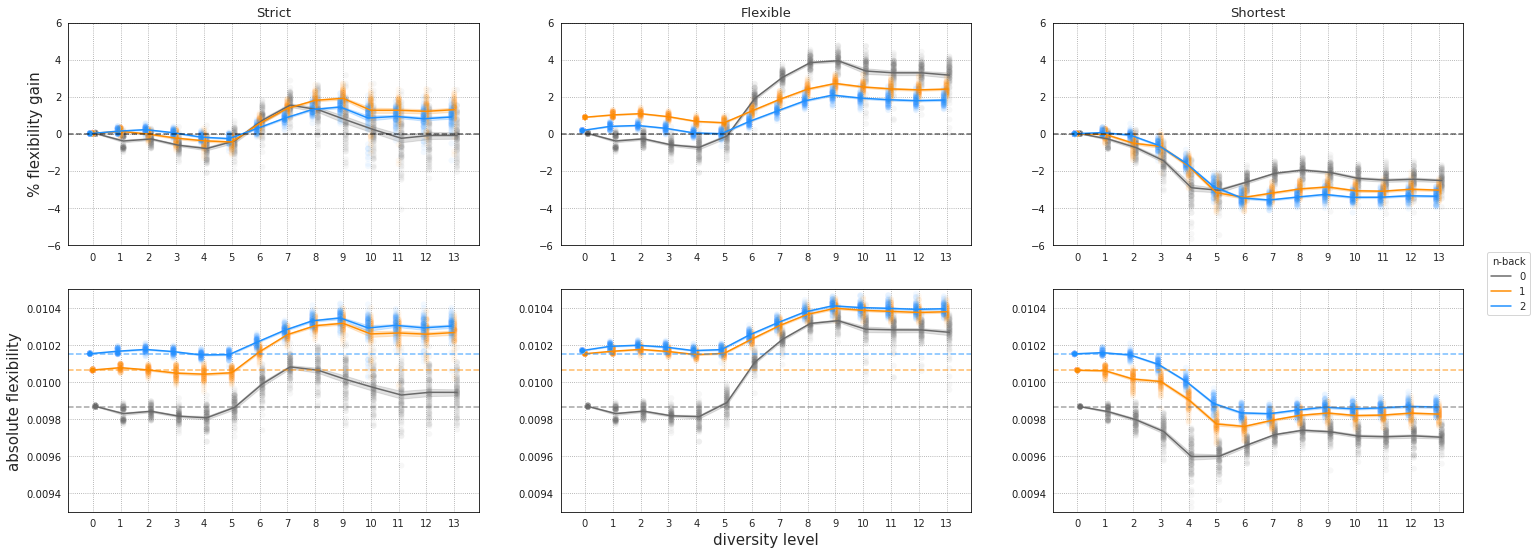

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,9))
for col in range(3):
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                            (aggs['diversity_level']<=13)],
                 x='diversity_level_dodge',
                 y='flexibility_gain_tot', ax=ax[0,col], 
                 hue='n_back',
                 palette=palette) 
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                              (aggs['diversity_level']<=13)],
                  x='diversity_level_dodge',
                  y='flexibility_gain_tot', ax=ax[0,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    ax[0,col].axhline(0, linestyle='--', color='black', alpha=.6)
    ax[0,col].set_ylim(-6,6)
    ax[0,col].set_title(f'{itypes[col].capitalize()}',size=13)
    if col == 0:
        ax[0,col].set_ylabel('% flexibility gain', size=15)
    else:
        ax[0,col].set_ylabel('')
    if col == 2:
        ax[0,col].legend(title='n-back', 
                           bbox_to_anchor=(1.11, -.01), 
                           loc='upper center')
    else:
        ax[0,col].legend([],[],frameon=False)
    ax[0,col].set_xticks(range(14))
    
    # Fluency absolute
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                            (aggs['diversity_level']<=13)],
                 x='diversity_level_dodge',
                 y='flexibility_speaker', ax=ax[1,col], 
                 hue='n_back',
                 palette=palette) 
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                              (aggs['diversity_level']<=13)],
                  x='diversity_level_dodge',
                  y='flexibility_speaker', ax=ax[1,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    for n in range(3):
        ax[1,col].axhline(aggs[aggs['n_back']==n].flexibility_a0.iloc[0],
                          color=palette[n], linestyle='--', alpha=.6)
    ax[1,col].set_ylim(0.0093,0.0105)
    ax[1,col].set_title('')
    if col == 0:
        ax[1,col].set_ylabel('absolute flexibility', size=15)
    else:
        ax[1,col].set_ylabel('')
    ax[1,col].legend([],[],frameon=False)
    ax[1,col].set_xticks(range(14))    
    
    if col == 1:
        ax[1,col].set_xlabel('diversity level', size=15)
    else:
        ax[1,col].set_xlabel('')
    ax[0,col].set_xlabel('')
# plt.suptitle('Flexibility', size=24, y=0.99, x=.51)
plt.show()

### Originality

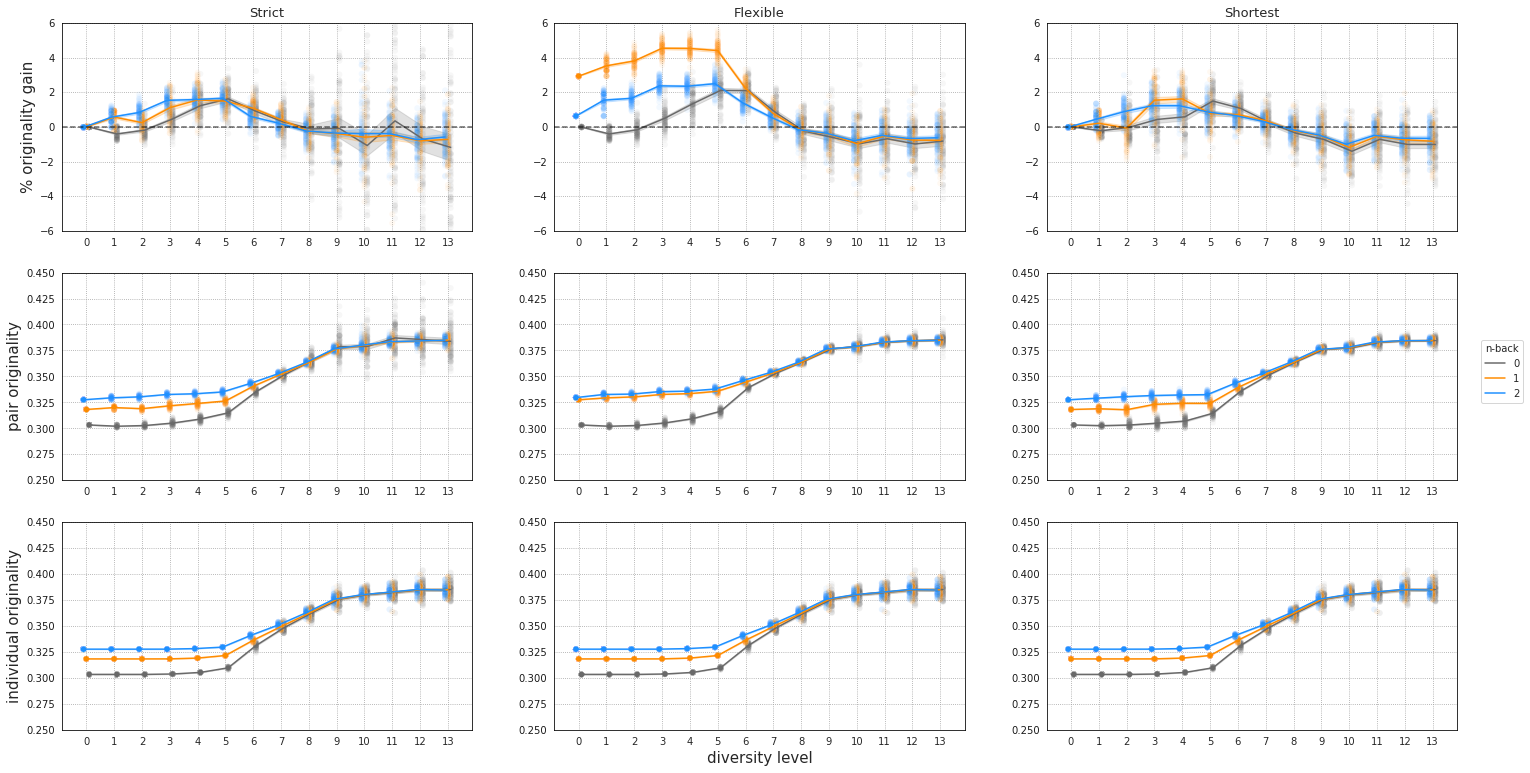

In [43]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,13))
for col in range(3):
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                            (aggs['diversity_level']<=13)],
                 x='diversity_level_dodge',
                 y='orig_gain_tot', ax=ax[0,col], 
                 hue='n_back',
                 palette=palette) 
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                              (aggs['diversity_level']<=13)],
                  x='diversity_level_dodge',
                  y='orig_gain_tot', ax=ax[0,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    ax[0,col].axhline(0, linestyle='--', color='black', alpha=.6)
    ax[0,col].set_ylim(-6,6)
    ax[0,col].set_title(f'{itypes[col].capitalize()}',size=13)
    if col == 0:
        ax[0,col].set_ylabel('% originality gain', size=15)
    else:
        ax[0,col].set_ylabel('')
    ax[0,col].set_xticks(range(14))
    
    # Fluency absolute
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                            (aggs['diversity_level']<=13)],
                 x='diversity_level_dodge',
                 y='orig_pair', ax=ax[1,col], 
                 hue='n_back',
                 palette=palette)
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                              (aggs['diversity_level']<=13)],
                  x='diversity_level_dodge',
                  y='orig_pair', ax=ax[1,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    ax[1,col].set_ylim(0.25,0.45)
    ax[1,col].set_title('')
    if col == 0:
        ax[1,col].set_ylabel('pair originality', size=15)
    else:
        ax[1,col].set_ylabel('')
    ax[1,col].legend([],[],frameon=False)
    ax[1,col].set_xticks(range(14))    
    ax[1,col].set_xlabel('')
    ax[0,col].set_xlabel('')
    sns.lineplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                            (aggs['diversity_level']<=13)],
                 x='diversity_level_dodge',
                 y='orig_a0', ax=ax[2,col], 
                 hue='n_back',
                 palette=palette) 
    sns.scatterplot(data=aggs[(aggs['interaction_type']==itypes[col]) & 
                              (aggs['diversity_level']<=13)],
                  x='diversity_level_dodge',
                  y='orig_a0', ax=ax[2,col], 
                  hue='n_back',
                  alpha=.05,
                  palette=palette, 
                  legend=False)
    ax[2,col].set_ylim(0.25,0.45)
    ax[2,col].set_title('')
    if col == 0:
        ax[2,col].set_ylabel('individual originality', size=15)
    else:
        ax[2,col].set_ylabel('')
    ax[2,col].legend([],[],frameon=False)
    ax[2,col].set_xticks(range(14))    
    
    if col == 1:
        ax[2,col].set_xlabel('diversity level', size=15)
    else:
        ax[2,col].set_xlabel('')
    ax[0,col].set_xlabel('')
    ax[0,col].legend([],[],frameon=False)
    ax[2,col].legend([],[],frameon=False)
    if col == 2:
        ax[1,col].legend(title='n-back', 
                           bbox_to_anchor=(1.11, .7), 
                           loc='upper center')
    else:
        ax[1,col].legend([],[],frameon=False)
# plt.suptitle('Flexibility', size=24, y=0.99, x=.51)
plt.show()

### Visualize trials

In [ ]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP(n_neighbors=10, min_dist=.1, random_state=42)

In [ ]:
space = pd.read_csv(f'diversity_abm/models/wiki_vectors.tsv', sep='\t', index_col=0, header=None)
animals = pd.read_csv(f'diversity_abm/models/animal_list.csv')['Animals'].tolist()
scaled_space = StandardScaler().fit_transform(space)
embeddings = reducer.fit_transform(scaled_space)

In [ ]:
embedding_df = pd.DataFrame(embeddings, columns=['x','y'])
embedding_df.index = animals
embedding_df = embedding_df.reset_index().rename({'index': 'name'}, axis=1)

In [ ]:
import plotly.express as px
fig = px.scatter(embedding_df, 
                 x="x", y="y", 
                 hover_data=['name'],
                 width=1000, 
                 height=600, 
                 title='UMAP reduction of embedding space',
                 template='plotly_white')
fig.update_traces(marker=dict(color='darkred'))
fig.update_layout(
            title={
            'x':0.5, 
            'xanchor': 'center'
        })
fig.show()

In [ ]:
embedding_df.to_csv('diversity_abm/models/umap_wiki_vectors.tsv', sep='\t', index=False)

### Plot trials

In [27]:
pair_df = pd.read_csv(f'diversity_abm/models/21_08_20/sampled_pairs.tsv', sep='\t')

In [28]:
sampled_pairs = pair_df.groupby('noise_level1').sample(1)
sampled_pairs = (sampled_pairs['fname_1'].str.split('.').str[0] + '_' \
                + sampled_pairs['fname_2'].str.split('.').str[0]).tolist()
sampled_idx = dict(zip(embedding_df.name, range(embedding_df.shape[0])))

In [84]:
def _make_reduced_space(reference):
    reducer = umap.UMAP(n_neighbors=10, min_dist=.1, random_state=42)
    space = pd.read_csv(f'diversity_abm/models/21_08_20/noised_vectors/{reference}.tsv', 
                        sep='\t', index_col=0)
    animals = pd.read_csv(f'diversity_abm/models/animal_list.csv')['Animals'].tolist()
    scaled_space = StandardScaler().fit_transform(space)
    embeddings = reducer.fit_transform(scaled_space)
    embedding_df = pd.DataFrame(embeddings, columns=['x','y'])
    embedding_df.index = animals
    embedding_df = embedding_df.reset_index().rename({'index': 'name'}, axis=1)
    return embedding_df

In [21]:
import glob
dfs = []; embedding_spaces = [];
for p in sampled_pairs:
    for n in [0,1,2]:
        for condition in ['strict', 'flexible','shortest', 'individual']:
            if condition != 'individual':
                f = glob.glob(f"diversity_abm/logs/21_08_20/{n}_back/{condition}/{p}*")[0]
                df = pd.read_csv(f)
            else:
                f = glob.glob(f"diversity_abm/logs/21_08_20/{n}_back/{condition}/{'_'.join(p.split('_')[:3])}*")[0]
                f_2 = glob.glob(f"diversity_abm/logs/21_08_20/{n}_back/{condition}/{'_'.join(p.split('_')[3:])}*")[0]
                df_1 = pd.read_csv(f)
                df_2 = pd.read_csv(f_2)
                if df_1[df_1['init_seed']=='goat'].turn.max() >= df_2[df_2['init_seed']=='goat'].turn.max():
                    df = df_1.copy()
                    reference = '_'.join(p.split('_')[:3])
                else:
                    df = df_2.copy()
                    reference = '_'.join(p.split('_')[3:])
                if n == 0:
                    embedding_spaces.append(_make_reduced_space(reference))
            if condition != 'individual':
                df['prob_speaker'] = np.where(df['agent']==df['log_id'].str.split('_').str[:3].apply(lambda x: '_'.join(x)),
                                              df['prob0'],
                                              df['prob1'])
            else:
                df['prob_speaker'] = df['prob0']
            df = df[df['init_seed']=='goat']
            trial_probs = df.prob_speaker.tolist()
            dfs.append(pd.DataFrame(zip(trial_probs,
                                        df['seed'].tolist(),
                                        df['response'].tolist(),
                                        [p.split('_')[1]]*len(trial_probs),
                                        [n]*len(trial_probs), 
                                        [condition]*len(trial_probs),
                                        [p]*len(trial_probs),
                                        range(len(trial_probs))),
                                    columns=['prob', 'seed', 'response', 'diversity', 
                                             'n_back', 'condition', 'pair', 'turn']))
                

In [22]:
data = pd.concat(dfs)

#### Make static trial plot

In [ ]:
n_back = 2
f, ax = plt.subplots(figsize=(15,4*6), ncols=4, nrows=6)
for div, dl in enumerate([2,4,6,8,10,12]):
    p = sampled_pairs[dl]
    for c_idx, c in enumerate(['individual', 'strict', 'flexible', 'shortest']):
        d = data[(data['condition']==c) &
                 (data['n_back']==n_back) &
                 (data['pair']==p)]
        named = d.seed.tolist() + [d.response.tolist()[-1]]
        named_idx = [sampled_idx[i] for i in named]
        xs = [embedding_spaces[dl].iloc[n,1] for n in named_idx]
        ys = [embedding_spaces[dl].iloc[n,2] for n in named_idx]
        for ix in range(len(xs)-1):
            ax[div,c_idx].arrow(x=xs[ix], 
                                y=ys[ix], 
                                dx=xs[ix+1]-xs[ix],
                                dy=ys[ix+1]-ys[ix],
                                shape='full', 
                                lw=.5,
                                length_includes_head=True, 
                                head_width=.05, 
                                color='steelblue', 
                                alpha=.05)
        ax[div,c_idx].scatter(embedding_spaces[dl].iloc[:,1], 
                              embedding_spaces[dl].iloc[:,2], s=2, color='k')
        ax[div,c_idx].set_title(c)
    ax[div,0].set_ylabel(f'Diversity level: {p.split("_")[1]}')
plt.show()

#### Make pngs

In [ ]:
from pathlib import Path
for div, dl in enumerate([2,4,6,8,10,12]):
    p = sampled_pairs[dl]
    f, ax = plt.subplots(figsize=(5*4,4), ncols=4, nrows=1)
    pair_data = data[(data['n_back']==0) &
                     (data['pair']==p)]
    n_steps = data['turn'].max()
    for ix in range(n_steps):
        for c_idx, c in enumerate(['individual','strict', 'flexible','shortest']):
            d = pair_data[(pair_data['condition']==c)]
            named = d.seed.tolist() + [d.response.tolist()[-1]]
            named_idx = [sampled_idx[i] for i in named]
            xs = [embedding_spaces[dl].iloc[n,1] for n in named_idx]
            max_val = len(xs) - 2
            ys = [embedding_spaces[dl].iloc[n,2] for n in named_idx]
            ax[c_idx].set_title(c)
            ax[c_idx].scatter(embedding_spaces[dl].iloc[:,1], 
                        embedding_spaces[dl].iloc[:,2], s=2, color='k')
            ax[c_idx].set_ylabel(f'Diversity level: {p.split("_")[1]}')
            if len(xs) - ix >= 2:
                ax[c_idx].arrow(x=xs[ix], 
                                y=ys[ix], 
                                dx=xs[ix+1]-xs[ix],
                                dy=ys[ix+1]-ys[ix],
                                shape='full', 
                                lw=.5,
                                length_includes_head=True, 
                                head_width=.05, 
                                color='steelblue', 
                                alpha=.5)
            else:
                ax[c_idx].arrow(x=xs[max_val], 
                                y=ys[max_val], 
                                dx=xs[max_val+1]-xs[max_val],
                                dy=ys[max_val+1]-ys[max_val],
                                shape='full', 
                                lw=.5,
                                length_includes_head=True, 
                                head_width=.05, 
                                color='steelblue', 
                                alpha=.5)
        Path(f'gifs/{n_back}_back/combined/{dl}').mkdir(parents=True, exist_ok=True)
        plt.savefig(f'gifs/{n_back}_back/combined/{dl}/step_{ix}.png');

#### Also make individual pngs

In [ ]:
from pathlib import Path
for div, dl in enumerate([2,4,6,8,10,12]):
    p = sampled_pairs[dl]
    for c_idx, c in enumerate(['individual', 'strict', 'flexible','shortest']):
        d = data[(data['condition']==c) &
                 (data['n_back']==0) &
                 (data['pair']==p)]
        named = d.seed.tolist() + [d.response.tolist()[-1]]
        named_idx = [sampled_idx[i] for i in named]
        xs = [embedding_spaces[dl].iloc[n,1] for n in named_idx]
        ys = [embedding_spaces[dl].iloc[n,2] for n in named_idx]
        f, ax = plt.subplots(figsize=(5,4), ncols=1, nrows=1)
        plt.title(c)
        plt.scatter(embedding_spaces[dl].iloc[:,1], 
                    embedding_spaces[dl].iloc[:,2], s=2, color='k')
        plt.ylabel(f'Diversity level: {p.split("_")[1]}')
        for ix in range(len(xs)-1):
            plt.arrow(x=xs[ix], 
                      y=ys[ix], 
                      dx=xs[ix+1]-xs[ix],
                      dy=ys[ix+1]-ys[ix],
                      shape='full', 
                      lw=.5,
                      length_includes_head=True, 
                      head_width=.05, 
                      color='steelblue', 
                    alpha=.05)
            Path(f'gifs/{n_back}_back/{c}/{dl}').mkdir(parents=True, exist_ok=True)
            plt.savefig(f'gifs/{n_back}_back/{c}/{dl}/step_{ix}.png');

#### Make gifs

In [34]:
import imageio
from IPython.display import Image, display

for c in ['combined', 'individual', 'strict', 'flexible', 'shortest']:
    for dl in [2,4,6,8,10,12]:
        images = []
        fnames = glob.glob(f'gifs/{n_back}_back/{c}/{dl}/*')
        fnames = sorted(fnames, key=lambda x: int(x.split('/')[-1].split('_')[-1].split('.')[0]))
        for filename in fnames:
            images.append(imageio.imread(filename))
        imageio.mimsave(f'gifs/{n_back}_back/{c}_diversity_{dl}.gif', images)

In [19]:
#imgs = [Image(f"gifs/combined_diversity_{dl}.gif")
#        for dl in [2,4,6,8,10,12]]
#display(*imgs)